# Pandas介绍
- 2008年WesMcKinney开发的库
- 专门用于数据挖掘的开源python库
- 以Numpy为基础，借力Numpy模块在计算方面性能高的优势
- 基于matplotlib，能够简便的画图
- 独特的数据结构
- 数据处理工具

- panel + data + analysis
    - panel 面板 panel data 面板数据，来源计量经济学 三维数据

## 为什么使用pandas
- 便捷的数据处理能力
- 读取文件方便
- 封装类Matplotlib, Numpy的画图和计算
## 核心数据结构
- DataFrame
- Panel
- Series
## 三个结构
- Series
    - 带索引的一维数组
- DataFrame
    - 带行索引和列索引的二维数组，DataFrame是Series的容器
- Panel 
    - MultiIndex与Panel是多维数组
    - Panel是DataFrame的容器

## DataFrame
### DataFrame结构
- 结构: 既有行索引，又有列索引的二维数组
    - 行索引，表名不同行，横向索引，叫做index
    - 列索引，表名不同列，纵向索引，叫做colums

In [256]:
# 创建一个符合正态分布的10个股票5天的涨跌幅数据
import random
import numpy as np
stock_change = np.random.normal(0,1,(10,5))
stock_change

array([[ 0.18654506, -2.06002697,  2.28960514,  0.22594911, -0.08032301],
       [-0.36515426,  0.80112809,  0.6020191 ,  0.29545101,  0.80365889],
       [-0.20015185,  0.25229199,  0.18284701,  0.02812573,  0.55755273],
       [ 0.51015139, -0.96986102, -0.14334646, -1.25353663, -0.04550229],
       [ 0.48086407,  0.23920995,  1.0122765 ,  0.80814667,  0.50218223],
       [-1.19518642, -1.25258778, -0.40495548, -0.123002  ,  0.77401252],
       [ 0.80182058,  0.69960772,  1.61397569,  0.30934682,  0.86098807],
       [-0.51005373, -0.35216808, -0.49002064,  0.87552502, -0.45004489],
       [-0.26444235,  0.03007439, -0.3758369 , -0.70178629, -0.61447442],
       [ 0.17105702, -0.37845416, -0.78912834,  1.8001776 ,  1.03669488]])

- 但是这样的数据形式很难看见存储的是什么数据，并且也很难获取相应的数据，比如需要获取某个指定股票的数据，很难去获取
- 如何让这组数据更具有意义的显示, 加上行列索引

In [6]:
import pandas as pd
pd.DataFrame(stock_change)
# 手动添加索引

,0,1,2,3,4
0,0.620105,-0.421163,-0.801915,-0.119047,-0.088398
1,0.300777,-0.855705,0.928211,-0.034026,1.599228
2,-0.646075,0.545548,0.190858,0.363695,-0.053299
3,-0.405131,-0.172905,1.594779,-1.014213,0.336472
4,0.875001,0.808683,-0.713062,-1.404163,-0.527424
5,-0.045389,-0.658623,0.182059,-0.496793,-3.529649
6,0.874884,-1.587020,0.859112,0.626152,-0.099266
7,-0.795353,0.495660,0.585881,0.853713,0.022931
8,0.800268,0.349657,2.232252,-0.526153,0.825794
9,-0.296742,-1.086333,-0.742855,0.672617,-0.221450


In [ ]:
import pandas as pd
pd.DataFrame(stock_change)

In [10]:
# 添加行索引
stock = ["股票 {}".format(i) for i in range(10)]

In [11]:
pd.DataFrame(stock_change, index = stock)

,0,1,2,3,4
股票 0,0.620105,-0.421163,-0.801915,-0.119047,-0.088398
股票 1,0.300777,-0.855705,0.928211,-0.034026,1.599228
股票 2,-0.646075,0.545548,0.190858,0.363695,-0.053299
股票 3,-0.405131,-0.172905,1.594779,-1.014213,0.336472
股票 4,0.875001,0.808683,-0.713062,-1.404163,-0.527424
股票 5,-0.045389,-0.658623,0.182059,-0.496793,-3.529649
股票 6,0.874884,-1.587020,0.859112,0.626152,-0.099266
股票 7,-0.795353,0.495660,0.585881,0.853713,0.022931
股票 8,0.800268,0.349657,2.232252,-0.526153,0.825794
股票 9,-0.296742,-1.086333,-0.742855,0.672617,-0.221450


In [14]:
# 添加列索引, 日期索引
date =pd.date_range(start="20190101",periods=5,freq="B")

In [16]:
pd.DataFrame(stock_change, index = stock, columns = date)

,2019-01-01 00:00:00,2019-01-02 00:00:00,2019-01-03 00:00:00,2019-01-04 00:00:00,2019-01-07 00:00:00
股票 0,0.620105,-0.421163,-0.801915,-0.119047,-0.088398
股票 1,0.300777,-0.855705,0.928211,-0.034026,1.599228
股票 2,-0.646075,0.545548,0.190858,0.363695,-0.053299
股票 3,-0.405131,-0.172905,1.594779,-1.014213,0.336472
股票 4,0.875001,0.808683,-0.713062,-1.404163,-0.527424
股票 5,-0.045389,-0.658623,0.182059,-0.496793,-3.529649
股票 6,0.874884,-1.587020,0.859112,0.626152,-0.099266
股票 7,-0.795353,0.495660,0.585881,0.853713,0.022931
股票 8,0.800268,0.349657,2.232252,-0.526153,0.825794
股票 9,-0.296742,-1.086333,-0.742855,0.672617,-0.221450


### DataFrame的属性和方法
- 常用属性：
    - shape
        - data.shape
    - index
        - data.index
    - columns
        - data.columns
    - values
        - data.values 直接获取其中array的值
    - T
        - 行列转置
    
- 方法：
    - 想看数据构成，有哪些字段，又不想把所有的数据都显示出来
    - head()
    - tail()


In [18]:
data = pd.DataFrame(stock_change, index = stock, columns = date)
data # 十行五列的二维数组 shape(10,5)

,2019-01-01 00:00:00,2019-01-02 00:00:00,2019-01-03 00:00:00,2019-01-04 00:00:00,2019-01-07 00:00:00
股票 0,0.620105,-0.421163,-0.801915,-0.119047,-0.088398
股票 1,0.300777,-0.855705,0.928211,-0.034026,1.599228
股票 2,-0.646075,0.545548,0.190858,0.363695,-0.053299
股票 3,-0.405131,-0.172905,1.594779,-1.014213,0.336472
股票 4,0.875001,0.808683,-0.713062,-1.404163,-0.527424
股票 5,-0.045389,-0.658623,0.182059,-0.496793,-3.529649
股票 6,0.874884,-1.587020,0.859112,0.626152,-0.099266
股票 7,-0.795353,0.495660,0.585881,0.853713,0.022931
股票 8,0.800268,0.349657,2.232252,-0.526153,0.825794
股票 9,-0.296742,-1.086333,-0.742855,0.672617,-0.221450


In [20]:
data.shape

(10, 5)

In [21]:
data.index

Index(['股票 0', '股票 1', '股票 2', '股票 3', '股票 4', '股票 5', '股票 6', '股票 7', '股票 8',
       '股票 9'],
      dtype='object')

In [22]:
data.columns

DatetimeIndex(['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04',
               '2019-01-07'],
              dtype='datetime64[ns]', freq='B')

In [23]:
data.values

array([[ 0.6201054 , -0.42116269, -0.8019148 , -0.11904675, -0.0883984 ],
       [ 0.30077672, -0.85570468,  0.92821117, -0.03402572,  1.59922802],
       [-0.64607456,  0.54554751,  0.19085838,  0.36369463, -0.05329903],
       [-0.4051315 , -0.17290455,  1.59477912, -1.01421296,  0.33647215],
       [ 0.87500072,  0.80868291, -0.71306224, -1.40416271, -0.52742413],
       [-0.04538906, -0.65862308,  0.18205942, -0.49679258, -3.52964872],
       [ 0.87488374, -1.58702017,  0.85911156,  0.626152  , -0.09926579],
       [-0.7953533 ,  0.49566018,  0.5858807 ,  0.85371292,  0.02293092],
       [ 0.80026782,  0.34965708,  2.23225168, -0.52615266,  0.82579405],
       [-0.29674202, -1.08633348, -0.74285464,  0.67261728, -0.22145027]])

In [30]:
data.head()
#默认返回前5行

,2019-01-01 00:00:00,2019-01-02 00:00:00,2019-01-03 00:00:00,2019-01-04 00:00:00,2019-01-07 00:00:00
股票 0,0.620105,-0.421163,-0.801915,-0.119047,-0.088398
股票 1,0.300777,-0.855705,0.928211,-0.034026,1.599228
股票 2,-0.646075,0.545548,0.190858,0.363695,-0.053299
股票 3,-0.405131,-0.172905,1.594779,-1.014213,0.336472
股票 4,0.875001,0.808683,-0.713062,-1.404163,-0.527424


In [31]:
data.head(3)

,2019-01-01 00:00:00,2019-01-02 00:00:00,2019-01-03 00:00:00,2019-01-04 00:00:00,2019-01-07 00:00:00
股票 0,0.620105,-0.421163,-0.801915,-0.119047,-0.088398
股票 1,0.300777,-0.855705,0.928211,-0.034026,1.599228
股票 2,-0.646075,0.545548,0.190858,0.363695,-0.053299


In [29]:
data.tail() #  默认返回后5行

,2019-01-01 00:00:00,2019-01-02 00:00:00,2019-01-03 00:00:00,2019-01-04 00:00:00,2019-01-07 00:00:00
股票 5,-0.045389,-0.658623,0.182059,-0.496793,-3.529649
股票 6,0.874884,-1.587020,0.859112,0.626152,-0.099266
股票 7,-0.795353,0.495660,0.585881,0.853713,0.022931
股票 8,0.800268,0.349657,2.232252,-0.526153,0.825794
股票 9,-0.296742,-1.086333,-0.742855,0.672617,-0.221450


### DataFrame索引的设置
- 修改行列索引值
    - 不能单独修改，必须要整体修改
- 重设索引
    - reset_index(drop=False)
        - 设置新的下标索引
        - drop：默认是False，不删除原来的索引，如果为True，删除原来的索引值
- 设置新的索引

#### 修改行列索引值

In [32]:
data.head()

,2019-01-01 00:00:00,2019-01-02 00:00:00,2019-01-03 00:00:00,2019-01-04 00:00:00,2019-01-07 00:00:00
股票 0,0.620105,-0.421163,-0.801915,-0.119047,-0.088398
股票 1,0.300777,-0.855705,0.928211,-0.034026,1.599228
股票 2,-0.646075,0.545548,0.190858,0.363695,-0.053299
股票 3,-0.405131,-0.172905,1.594779,-1.014213,0.336472
股票 4,0.875001,0.808683,-0.713062,-1.404163,-0.527424


In [35]:
data.index[2] = "股票88" # 不能单独修改，必须要整体修改

TypeError: Index does not support mutable operations

In [38]:
stock_ = ["股票_{}".format(i) for i in range(10)]
stock_

['股票_0',
 '股票_1',
 '股票_2',
 '股票_3',
 '股票_4',
 '股票_5',
 '股票_6',
 '股票_7',
 '股票_8',
 '股票_9']

In [39]:
data.index

Index(['股票 0', '股票 1', '股票 2', '股票 3', '股票 4', '股票 5', '股票 6', '股票 7', '股票 8',
       '股票 9'],
      dtype='object')

In [41]:
data.index = stock_
data.index

Index(['股票_0', '股票_1', '股票_2', '股票_3', '股票_4', '股票_5', '股票_6', '股票_7', '股票_8',
       '股票_9'],
      dtype='object')

In [42]:
data

,2019-01-01 00:00:00,2019-01-02 00:00:00,2019-01-03 00:00:00,2019-01-04 00:00:00,2019-01-07 00:00:00
股票_0,0.620105,-0.421163,-0.801915,-0.119047,-0.088398
股票_1,0.300777,-0.855705,0.928211,-0.034026,1.599228
股票_2,-0.646075,0.545548,0.190858,0.363695,-0.053299
股票_3,-0.405131,-0.172905,1.594779,-1.014213,0.336472
股票_4,0.875001,0.808683,-0.713062,-1.404163,-0.527424
股票_5,-0.045389,-0.658623,0.182059,-0.496793,-3.529649
股票_6,0.874884,-1.587020,0.859112,0.626152,-0.099266
股票_7,-0.795353,0.495660,0.585881,0.853713,0.022931
股票_8,0.800268,0.349657,2.232252,-0.526153,0.825794
股票_9,-0.296742,-1.086333,-0.742855,0.672617,-0.221450


#### 重设索引

In [44]:
data.reset_index()

,index,2019-01-01 00:00:00,2019-01-02 00:00:00,2019-01-03 00:00:00,2019-01-04 00:00:00,2019-01-07 00:00:00
0,股票_0,0.620105,-0.421163,-0.801915,-0.119047,-0.088398
1,股票_1,0.300777,-0.855705,0.928211,-0.034026,1.599228
2,股票_2,-0.646075,0.545548,0.190858,0.363695,-0.053299
3,股票_3,-0.405131,-0.172905,1.594779,-1.014213,0.336472
4,股票_4,0.875001,0.808683,-0.713062,-1.404163,-0.527424
5,股票_5,-0.045389,-0.658623,0.182059,-0.496793,-3.529649
6,股票_6,0.874884,-1.587020,0.859112,0.626152,-0.099266
7,股票_7,-0.795353,0.495660,0.585881,0.853713,0.022931
8,股票_8,0.800268,0.349657,2.232252,-0.526153,0.825794
9,股票_9,-0.296742,-1.086333,-0.742855,0.672617,-0.221450


In [46]:
data.reset_index().shape # 多了一列

(10, 6)

In [47]:
data.reset_index(drop = True)  # 原来索引那列被删除了

,2019-01-01 00:00:00,2019-01-02 00:00:00,2019-01-03 00:00:00,2019-01-04 00:00:00,2019-01-07 00:00:00
0,0.620105,-0.421163,-0.801915,-0.119047,-0.088398
1,0.300777,-0.855705,0.928211,-0.034026,1.599228
2,-0.646075,0.545548,0.190858,0.363695,-0.053299
3,-0.405131,-0.172905,1.594779,-1.014213,0.336472
4,0.875001,0.808683,-0.713062,-1.404163,-0.527424
5,-0.045389,-0.658623,0.182059,-0.496793,-3.529649
6,0.874884,-1.587020,0.859112,0.626152,-0.099266
7,-0.795353,0.495660,0.585881,0.853713,0.022931
8,0.800268,0.349657,2.232252,-0.526153,0.825794
9,-0.296742,-1.086333,-0.742855,0.672617,-0.221450


In [49]:
data.reset_index(drop = True).shape

(10, 5)

#### 设置新的索引
- set_index(keys,drop=True)
    - keys: 列索引名称或者列索引名称的列表
    - drop： boolean，default True，当做新的索引，删除原来的列

In [50]:
# 用字典生成dataframe
df = pd.DataFrame({'month': [1, 4, 7, 10],
                    'year': [2012, 2014, 2013, 2014],
                    'sale':[55, 40, 84, 31]})

In [51]:
df

,month,sale,year
0,1,55,2012
1,4,40,2014
2,7,84,2013
3,10,31,2014


In [52]:
# 以月份设置成新的索引
df.set_index("month")

,sale,year
month,,
1,55,2012
4,40,2014
7,84,2013
10,31,2014


In [60]:
df.set_index("month", drop = False)

,month,sale,year
month,,,
1,1,55,2012
4,4,40,2014
7,7,84,2013
10,10,31,2014


In [62]:
df.index

RangeIndex(start=0, stop=4, step=1)

In [58]:
# month和sale都做为索引
new_def = df.set_index(["month","year"])
new_def

,,sale
month,year,
1,2012,55
4,2014,40
7,2013,84
10,2014,31


In [59]:
new_def.index

MultiIndex(levels=[[1, 4, 7, 10], [2012, 2013, 2014]],
           labels=[[0, 1, 2, 3], [0, 2, 1, 2]],
           names=['month', 'year'])

- 通过刚才的设置，这样 Data Frame就变成类一个具有MultiIndex的DataFrame
## MultiIndex与Panel
### MultiIndex
- 多级或分层索引对象
- indexd的属性
    - names：levels的名称
    - levels： 每个level的元组值


In [65]:
new_def.index.names ## 这样的一个data frame，有几个索引，索引的名字

FrozenList(['month', 'year'])

In [67]:
new_def.index.levels  ##

FrozenList([[1, 4, 7, 10], [2012, 2013, 2014]])

### Panel
- 用来存储三维结构的面板
- class pandas.Panel(data=None,items=None,major_axis=None,minor_axis=None,copy=False,dtype=None)
- Panel看出data frame的容器
- items axis 0, 每个项目对应于内部包含的数据帧(DataFrame)
- major_axis axis 1, 他是每个数据帧(DataFrame)的索引(行)
- minor_axis axis 2, 他是每个数据帧(DataFrame)的列
- 推荐使用用于表示3D数据的方法是DataFrame上的MultiIndex的方法

In [69]:
p = pd.Panel(np.arange(24).reshape(4,3,2),
                 items=list('ABCD'),
                 major_axis=pd.date_range('20130101', periods=3),
                 minor_axis=['first', 'second'])
p

<class 'pandas.core.panel.Panel'>
Dimensions: 4 (items) x 3 (major_axis) x 2 (minor_axis)
Items axis: A to D
Major_axis axis: 2013-01-01 00:00:00 to 2013-01-03 00:00:00
Minor_axis axis: first to second

In [70]:
p["A"]

,first,second
2013-01-01,0,1
2013-01-02,2,3
2013-01-03,4,5


In [71]:
p["B"]

,first,second
2013-01-01,6,7
2013-01-02,8,9
2013-01-03,10,11


In [73]:
p.major_xs("20130101")

,A,B,C,D
first,0,6,12,18
second,1,7,13,19


In [76]:
p.minor_xs("first")

,A,B,C,D
2013-01-01,0,6,12,18
2013-01-02,2,8,14,20
2013-01-03,4,10,16,22


## Series
- 带索引的一维数组
- series结构只有行索引
- 属性
    - index
    - values 一维数组 ndarray
- 方法


In [77]:
data

,2019-01-01 00:00:00,2019-01-02 00:00:00,2019-01-03 00:00:00,2019-01-04 00:00:00,2019-01-07 00:00:00
股票_0,0.620105,-0.421163,-0.801915,-0.119047,-0.088398
股票_1,0.300777,-0.855705,0.928211,-0.034026,1.599228
股票_2,-0.646075,0.545548,0.190858,0.363695,-0.053299
股票_3,-0.405131,-0.172905,1.594779,-1.014213,0.336472
股票_4,0.875001,0.808683,-0.713062,-1.404163,-0.527424
股票_5,-0.045389,-0.658623,0.182059,-0.496793,-3.529649
股票_6,0.874884,-1.587020,0.859112,0.626152,-0.099266
股票_7,-0.795353,0.495660,0.585881,0.853713,0.022931
股票_8,0.800268,0.349657,2.232252,-0.526153,0.825794
股票_9,-0.296742,-1.086333,-0.742855,0.672617,-0.221450


In [84]:
sr = data.iloc[1,:]  #股票1的数据，抽取了一行
sr

2019-01-01    0.300777
2019-01-02   -0.855705
2019-01-03    0.928211
2019-01-04   -0.034026
2019-01-07    1.599228
Freq: B, Name: 股票_1, dtype: float64

In [85]:
sr.index

DatetimeIndex(['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04',
               '2019-01-07'],
              dtype='datetime64[ns]', freq='B')

In [87]:
sr.values 

array([ 0.30077672, -0.85570468,  0.92821117, -0.03402572,  1.59922802])

In [88]:
type(sr.values)

numpy.ndarray

In [82]:
data.iloc[1,:].index

DatetimeIndex(['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04',
               '2019-01-07'],
              dtype='datetime64[ns]', freq='B')

### 创建Series
-
- 通过已有数据创建
    - 指定内容，默认索引
        - pd.Series(np.arange(10))
    - 指定索引
        - pd.Series([6.7,5.6,3,10,2],index=[1,2,3,4,5])
    - 通过字典数据创建
        - pd.Series({'red':100,'blue':200,'green':500,'yellow'})

In [90]:
pd.Series(np.arange(3,9,2))

0    3
1    5
2    7
dtype: int32

In [93]:
pd.Series(np.arange(3,9,2),index=['A','B','C'])

A    3
B    5
C    7
dtype: int32

In [95]:
pd.Series({'red':3,'blue':5,'yellow':7})

blue      5
red       3
yellow    7
dtype: int64

In [96]:
pd.Series([6.7,5.6,3,10,2],index=[1,2,3,4,5])

1     6.7
2     5.6
3     3.0
4    10.0
5     2.0
dtype: float64

In [101]:
pd.Series({'red':100,'blue':200,'green':500,'yellow':7})

blue      200
green     500
red       100
yellow      7
dtype: int64

### Series获取索引和值
- index
- values

# 基础数据操作

In [105]:
# 读取文件
data = pd.read_csv("stock_day.csv")
data

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20,turnover
2018-02-27,23.53,25.88,24.16,23.53,95578.03,0.63,2.68,22.942,22.142,22.875,53782.64,46738.65,55576.11,2.39
2018-02-26,22.80,23.78,23.53,22.80,60985.11,0.69,3.02,22.406,21.955,22.942,40827.52,42736.34,56007.50,1.53
2018-02-23,22.88,23.37,22.82,22.71,52914.01,0.54,2.42,21.938,21.929,23.022,35119.58,41871.97,56372.85,1.32
2018-02-22,22.25,22.76,22.28,22.02,36105.01,0.36,1.64,21.446,21.909,23.137,35397.58,39904.78,60149.60,0.90
2018-02-14,21.49,21.99,21.92,21.48,23331.04,0.44,2.05,21.366,21.923,23.253,33590.21,42935.74,61716.11,0.58
2018-02-13,21.40,21.90,21.48,21.31,30802.45,0.28,1.32,21.342,22.103,23.387,39694.65,45518.14,65161.68,0.77
2018-02-12,20.70,21.40,21.19,20.63,32445.39,0.82,4.03,21.504,22.338,23.533,44645.16,45679.94,68686.33,0.81
2018-02-09,21.20,21.46,20.36,20.19,54304.01,-1.50,-6.86,21.920,22.596,23.645,48624.36,48982.38,70552.47,1.36
2018-02-08,21.79,22.09,21.88,21.75,27068.16,0.09,0.41,22.372,23.009,23.839,44411.98,48612.16,73852.45,0.68
2018-02-07,22.69,23.11,21.80,21.29,53853.25,-0.50,-2.24,22.480,23.258,23.929,52281.28,56315.11,74925.33,1.35


In [107]:
data = data.drop(["ma5","ma10","ma20","v_ma5","v_ma10","v_ma20"], axis=1)

## 索引操作
- 直接索引
- 按名字索引
- 按数字索引
- 组合索引

### 直接索引 
- 必须先列后行

In [108]:
# numpy当中我们已经讲过使用索引选取序列和切片选择
stock_change

array([[ 0.6201054 , -0.42116269, -0.8019148 , -0.11904675, -0.0883984 ],
       [ 0.30077672, -0.85570468,  0.92821117, -0.03402572,  1.59922802],
       [-0.64607456,  0.54554751,  0.19085838,  0.36369463, -0.05329903],
       [-0.4051315 , -0.17290455,  1.59477912, -1.01421296,  0.33647215],
       [ 0.87500072,  0.80868291, -0.71306224, -1.40416271, -0.52742413],
       [-0.04538906, -0.65862308,  0.18205942, -0.49679258, -3.52964872],
       [ 0.87488374, -1.58702017,  0.85911156,  0.626152  , -0.09926579],
       [-0.7953533 ,  0.49566018,  0.5858807 ,  0.85371292,  0.02293092],
       [ 0.80026782,  0.34965708,  2.23225168, -0.52615266,  0.82579405],
       [-0.29674202, -1.08633348, -0.74285464,  0.67261728, -0.22145027]])

In [109]:
stock_change[1,2]

0.92821117352658122

In [110]:
data

,open,high,close,low,volume,price_change,p_change,turnover
2018-02-27,23.53,25.88,24.16,23.53,95578.03,0.63,2.68,2.39
2018-02-26,22.80,23.78,23.53,22.80,60985.11,0.69,3.02,1.53
2018-02-23,22.88,23.37,22.82,22.71,52914.01,0.54,2.42,1.32
2018-02-22,22.25,22.76,22.28,22.02,36105.01,0.36,1.64,0.90
2018-02-14,21.49,21.99,21.92,21.48,23331.04,0.44,2.05,0.58
2018-02-13,21.40,21.90,21.48,21.31,30802.45,0.28,1.32,0.77
2018-02-12,20.70,21.40,21.19,20.63,32445.39,0.82,4.03,0.81
2018-02-09,21.20,21.46,20.36,20.19,54304.01,-1.50,-6.86,1.36
2018-02-08,21.79,22.09,21.88,21.75,27068.16,0.09,0.41,0.68
2018-02-07,22.69,23.11,21.80,21.29,53853.25,-0.50,-2.24,1.35


In [111]:
data[2,1] #不能进行直接索引

KeyError: (2, 1)

In [113]:
data.head()

,open,high,close,low,volume,price_change,p_change,turnover
2018-02-27,23.53,25.88,24.16,23.53,95578.03,0.63,2.68,2.39
2018-02-26,22.80,23.78,23.53,22.80,60985.11,0.69,3.02,1.53
2018-02-23,22.88,23.37,22.82,22.71,52914.01,0.54,2.42,1.32
2018-02-22,22.25,22.76,22.28,22.02,36105.01,0.36,1.64,0.90
2018-02-14,21.49,21.99,21.92,21.48,23331.04,0.44,2.05,0.58


In [116]:
##必须先列后行
data["open"]["2018-02-26"]

22.800000000000001

### 按名字索引
- loc 使用索引

In [117]:
data.loc["2018-02-26"]["open"]

22.800000000000001

In [118]:
data.loc["2018-02-26","open"]

22.800000000000001

### 按数字索引
- iloc使用索引

In [120]:
data.iloc[1,0]

22.800000000000001

### 组合索引
- ix

In [122]:
data.ix[0:4,['open','close','high','low']]

,open,close,high,low
2018-02-27,23.53,24.16,25.88,23.53
2018-02-26,22.80,23.53,23.78,22.80
2018-02-23,22.88,22.82,23.37,22.71
2018-02-22,22.25,22.28,22.76,22.02


In [123]:
## 推荐名字索引和数字索引
data.loc[data.index[0:4],['open','close','high','low']]

,open,close,high,low
2018-02-27,23.53,24.16,25.88,23.53
2018-02-26,22.80,23.53,23.78,22.80
2018-02-23,22.88,22.82,23.37,22.71
2018-02-22,22.25,22.28,22.76,22.02


In [124]:
data.iloc[0:4,data.columns.get_indexer(['open','close','high','low'])]

,open,close,high,low
2018-02-27,23.53,24.16,25.88,23.53
2018-02-26,22.80,23.53,23.78,22.80
2018-02-23,22.88,22.82,23.37,22.71
2018-02-22,22.25,22.28,22.76,22.02


## 赋值操作
- 对DataFrame当中的close列进行重新赋值为1

In [126]:
data['close']=1
data

,open,high,close,low,volume,price_change,p_change,turnover
2018-02-27,23.53,25.88,1,23.53,95578.03,0.63,2.68,2.39
2018-02-26,22.80,23.78,1,22.80,60985.11,0.69,3.02,1.53
2018-02-23,22.88,23.37,1,22.71,52914.01,0.54,2.42,1.32
2018-02-22,22.25,22.76,1,22.02,36105.01,0.36,1.64,0.90
2018-02-14,21.49,21.99,1,21.48,23331.04,0.44,2.05,0.58
2018-02-13,21.40,21.90,1,21.31,30802.45,0.28,1.32,0.77
2018-02-12,20.70,21.40,1,20.63,32445.39,0.82,4.03,0.81
2018-02-09,21.20,21.46,1,20.19,54304.01,-1.50,-6.86,1.36
2018-02-08,21.79,22.09,1,21.75,27068.16,0.09,0.41,0.68
2018-02-07,22.69,23.11,1,21.29,53853.25,-0.50,-2.24,1.35


In [128]:
data.close = 1
data

,open,high,close,low,volume,price_change,p_change,turnover
2018-02-27,23.53,25.88,1,23.53,95578.03,0.63,2.68,2.39
2018-02-26,22.80,23.78,1,22.80,60985.11,0.69,3.02,1.53
2018-02-23,22.88,23.37,1,22.71,52914.01,0.54,2.42,1.32
2018-02-22,22.25,22.76,1,22.02,36105.01,0.36,1.64,0.90
2018-02-14,21.49,21.99,1,21.48,23331.04,0.44,2.05,0.58
2018-02-13,21.40,21.90,1,21.31,30802.45,0.28,1.32,0.77
2018-02-12,20.70,21.40,1,20.63,32445.39,0.82,4.03,0.81
2018-02-09,21.20,21.46,1,20.19,54304.01,-1.50,-6.86,1.36
2018-02-08,21.79,22.09,1,21.75,27068.16,0.09,0.41,0.68
2018-02-07,22.69,23.11,1,21.29,53853.25,-0.50,-2.24,1.35


In [130]:
data.iloc[1,0]=222
data

,open,high,close,low,volume,price_change,p_change,turnover
2018-02-27,23.53,25.88,1,23.53,95578.03,0.63,2.68,2.39
2018-02-26,222.00,23.78,1,22.80,60985.11,0.69,3.02,1.53
2018-02-23,22.88,23.37,1,22.71,52914.01,0.54,2.42,1.32
2018-02-22,22.25,22.76,1,22.02,36105.01,0.36,1.64,0.90
2018-02-14,21.49,21.99,1,21.48,23331.04,0.44,2.05,0.58
2018-02-13,21.40,21.90,1,21.31,30802.45,0.28,1.32,0.77
2018-02-12,20.70,21.40,1,20.63,32445.39,0.82,4.03,0.81
2018-02-09,21.20,21.46,1,20.19,54304.01,-1.50,-6.86,1.36
2018-02-08,21.79,22.09,1,21.75,27068.16,0.09,0.41,0.68
2018-02-07,22.69,23.11,1,21.29,53853.25,-0.50,-2.24,1.35


## 排序
- 一种是对内容进行排序
- 一种是对索引进行排序

### DataFrame
- 内容排序
    - 使用df.sort_values(key=,ascending=)对内容进行排序
        - 单个键或者多个键进行排序，默认升序
        - ascending = True：升序
        - ascending = False：降序
    - 按照单个值排序
    - 按照多个值进行排序
    - 按照索引进行排序

In [132]:
# 按照涨幅大小进行排序，使用ascending指定按照大小排序
data = data.sort_values(by = "p_change",ascending=False).head()
data

,open,high,close,low,volume,price_change,p_change,turnover
2015-08-28,15.40,16.46,1,15.00,117827.60,1.50,10.03,4.03
2015-05-21,27.50,28.22,1,26.50,121190.11,2.57,10.02,4.15
2016-12-22,18.50,20.42,1,18.45,150470.83,1.86,10.02,3.77
2015-08-04,16.20,17.35,1,15.80,94292.63,1.58,10.02,3.23
2016-07-07,18.66,18.66,1,18.41,48756.55,1.70,10.02,1.67


In [136]:
# 按照多个键进行排序
data = data.sort_values(by = ['open','high'])
data

,open,high,close,low,volume,price_change,p_change,turnover
2015-08-28,15.40,16.46,1,15.00,117827.60,1.50,10.03,4.03
2015-08-04,16.20,17.35,1,15.80,94292.63,1.58,10.02,3.23
2016-12-22,18.50,20.42,1,18.45,150470.83,1.86,10.02,3.77
2016-07-07,18.66,18.66,1,18.41,48756.55,1.70,10.02,1.67
2015-05-21,27.50,28.22,1,26.50,121190.11,2.57,10.02,4.15


In [138]:
# 按照索引进行排序
data = pd.read_csv("stock_day.csv")
data

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20,turnover
2018-02-27,23.53,25.88,24.16,23.53,95578.03,0.63,2.68,22.942,22.142,22.875,53782.64,46738.65,55576.11,2.39
2018-02-26,22.80,23.78,23.53,22.80,60985.11,0.69,3.02,22.406,21.955,22.942,40827.52,42736.34,56007.50,1.53
2018-02-23,22.88,23.37,22.82,22.71,52914.01,0.54,2.42,21.938,21.929,23.022,35119.58,41871.97,56372.85,1.32
2018-02-22,22.25,22.76,22.28,22.02,36105.01,0.36,1.64,21.446,21.909,23.137,35397.58,39904.78,60149.60,0.90
2018-02-14,21.49,21.99,21.92,21.48,23331.04,0.44,2.05,21.366,21.923,23.253,33590.21,42935.74,61716.11,0.58
2018-02-13,21.40,21.90,21.48,21.31,30802.45,0.28,1.32,21.342,22.103,23.387,39694.65,45518.14,65161.68,0.77
2018-02-12,20.70,21.40,21.19,20.63,32445.39,0.82,4.03,21.504,22.338,23.533,44645.16,45679.94,68686.33,0.81
2018-02-09,21.20,21.46,20.36,20.19,54304.01,-1.50,-6.86,21.920,22.596,23.645,48624.36,48982.38,70552.47,1.36
2018-02-08,21.79,22.09,21.88,21.75,27068.16,0.09,0.41,22.372,23.009,23.839,44411.98,48612.16,73852.45,0.68
2018-02-07,22.69,23.11,21.80,21.29,53853.25,-0.50,-2.24,22.480,23.258,23.929,52281.28,56315.11,74925.33,1.35


In [141]:
data.sort_index().head()

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20,turnover
2015-03-02,12.25,12.67,12.52,12.20,96291.73,0.32,2.62,12.520,12.520,12.520,96291.73,96291.73,96291.73,3.30
2015-03-03,12.52,13.06,12.70,12.52,139071.61,0.18,1.44,12.610,12.610,12.610,117681.67,117681.67,117681.67,4.76
2015-03-04,12.80,12.92,12.90,12.61,67075.44,0.20,1.57,12.707,12.707,12.707,100812.93,100812.93,100812.93,2.30
2015-03-05,12.88,13.45,13.16,12.87,93180.39,0.26,2.02,12.820,12.820,12.820,98904.79,98904.79,98904.79,3.19
2015-03-06,13.17,14.48,14.28,13.13,179831.72,1.12,8.51,13.112,13.112,13.112,115090.18,115090.18,115090.18,6.16


### Series
- 一维，不用指定来排序

In [143]:
sr = data["open"]
sr

2018-02-27    23.53
2018-02-26    22.80
2018-02-23    22.88
2018-02-22    22.25
2018-02-14    21.49
2018-02-13    21.40
2018-02-12    20.70
2018-02-09    21.20
2018-02-08    21.79
2018-02-07    22.69
2018-02-06    22.80
2018-02-05    22.45
2018-02-02    22.40
2018-02-01    23.71
2018-01-31    23.85
2018-01-30    23.71
2018-01-29    24.40
2018-01-26    24.27
2018-01-25    24.99
2018-01-24    25.49
2018-01-23    25.15
2018-01-22    25.14
2018-01-19    24.60
2018-01-18    24.40
2018-01-17    24.42
2018-01-16    23.40
2018-01-15    24.01
2018-01-12    23.70
2018-01-11    23.67
2018-01-10    24.10
              ...  
2015-04-13    19.60
2015-04-10    19.55
2015-04-09    18.28
2015-04-08    17.60
2015-04-07    16.54
2015-04-03    16.44
2015-04-02    16.21
2015-04-01    16.18
2015-03-31    16.78
2015-03-30    15.99
2015-03-27    14.90
2015-03-26    15.14
2015-03-25    15.97
2015-03-24    15.38
2015-03-23    15.34
2015-03-20    15.38
2015-03-19    15.20
2015-03-18    15.18
2015-03-17    14.90


In [150]:
sr.sort_values(ascending = False).head()

2015-06-15    34.99
2015-06-12    34.69
2015-06-10    34.10
2017-11-01    33.85
2015-06-11    33.17
Name: open, dtype: float64

In [149]:
sr.sort_index().head()

2015-03-02    12.25
2015-03-03    12.52
2015-03-04    12.80
2015-03-05    12.88
2015-03-06    13.17
Name: open, dtype: float64

# DataFrame运算
## 算术运算
## 逻辑运算
## 统计运算
## 自定义运算

## 算术运算

In [153]:
## 算术运算
 data["open"] + 3

2018-02-27    26.53
2018-02-26    25.80
2018-02-23    25.88
2018-02-22    25.25
2018-02-14    24.49
2018-02-13    24.40
2018-02-12    23.70
2018-02-09    24.20
2018-02-08    24.79
2018-02-07    25.69
2018-02-06    25.80
2018-02-05    25.45
2018-02-02    25.40
2018-02-01    26.71
2018-01-31    26.85
2018-01-30    26.71
2018-01-29    27.40
2018-01-26    27.27
2018-01-25    27.99
2018-01-24    28.49
2018-01-23    28.15
2018-01-22    28.14
2018-01-19    27.60
2018-01-18    27.40
2018-01-17    27.42
2018-01-16    26.40
2018-01-15    27.01
2018-01-12    26.70
2018-01-11    26.67
2018-01-10    27.10
              ...  
2015-04-13    22.60
2015-04-10    22.55
2015-04-09    21.28
2015-04-08    20.60
2015-04-07    19.54
2015-04-03    19.44
2015-04-02    19.21
2015-04-01    19.18
2015-03-31    19.78
2015-03-30    18.99
2015-03-27    17.90
2015-03-26    18.14
2015-03-25    18.97
2015-03-24    18.38
2015-03-23    18.34
2015-03-20    18.38
2015-03-19    18.20
2015-03-18    18.18
2015-03-17    17.90


In [156]:
data["open"].add(3).head()

2018-02-27    26.53
2018-02-26    25.80
2018-02-23    25.88
2018-02-22    25.25
2018-02-14    24.49
Name: open, dtype: float64

In [157]:
data["open"].sub(3).head()

2018-02-27    20.53
2018-02-26    19.80
2018-02-23    19.88
2018-02-22    19.25
2018-02-14    18.49
Name: open, dtype: float64

In [ ]:
# 想要得到每天的涨跌大小 close-open的值

In [159]:
close = data["close"]
open_ = data["open"]

In [162]:
data['price change'] = close.sub(open_)
data['price change'].head()

2018-02-27    0.63
2018-02-26    0.73
2018-02-23   -0.06
2018-02-22    0.03
2018-02-14    0.43
Name: price change, dtype: float64

In [164]:
data["close"].sub(data["open"]).head()

2018-02-27    0.63
2018-02-26    0.73
2018-02-23   -0.06
2018-02-22    0.03
2018-02-14    0.43
dtype: float64

## 逻辑运算
- 逻辑运算符
    - <,>,|,&
    - 布尔索引
    - 多个条件筛选
- 逻辑运算函数
    - query(expr)
        - expr:查询字符串
    - isin(values)

In [165]:
## 逻辑运算符
data['p_change']>2

2018-02-27     True
2018-02-26     True
2018-02-23     True
2018-02-22    False
2018-02-14     True
2018-02-13    False
2018-02-12     True
2018-02-09    False
2018-02-08    False
2018-02-07    False
2018-02-06    False
2018-02-05     True
2018-02-02    False
2018-02-01    False
2018-01-31    False
2018-01-30    False
2018-01-29    False
2018-01-26    False
2018-01-25    False
2018-01-24    False
2018-01-23    False
2018-01-22    False
2018-01-19     True
2018-01-18    False
2018-01-17    False
2018-01-16     True
2018-01-15    False
2018-01-12     True
2018-01-11    False
2018-01-10    False
              ...  
2015-04-13     True
2015-04-10    False
2015-04-09     True
2015-04-08     True
2015-04-07     True
2015-04-03    False
2015-04-02    False
2015-04-01    False
2015-03-31    False
2015-03-30     True
2015-03-27     True
2015-03-26    False
2015-03-25    False
2015-03-24    False
2015-03-23    False
2015-03-20    False
2015-03-19    False
2015-03-18    False
2015-03-17     True


In [167]:
data[data['p_change']>2].head()

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20,turnover,price change
2018-02-27,23.53,25.88,24.16,23.53,95578.03,0.63,2.68,22.942,22.142,22.875,53782.64,46738.65,55576.11,2.39,0.63
2018-02-26,22.80,23.78,23.53,22.80,60985.11,0.69,3.02,22.406,21.955,22.942,40827.52,42736.34,56007.50,1.53,0.73
2018-02-23,22.88,23.37,22.82,22.71,52914.01,0.54,2.42,21.938,21.929,23.022,35119.58,41871.97,56372.85,1.32,-0.06
2018-02-14,21.49,21.99,21.92,21.48,23331.04,0.44,2.05,21.366,21.923,23.253,33590.21,42935.74,61716.11,0.58,0.43
2018-02-12,20.70,21.40,21.19,20.63,32445.39,0.82,4.03,21.504,22.338,23.533,44645.16,45679.94,68686.33,0.81,0.49


In [169]:
(data['p_change']>2) & (data["low"]>15)

2018-02-27     True
2018-02-26     True
2018-02-23     True
2018-02-22    False
2018-02-14     True
2018-02-13    False
2018-02-12     True
2018-02-09    False
2018-02-08    False
2018-02-07    False
2018-02-06    False
2018-02-05     True
2018-02-02    False
2018-02-01    False
2018-01-31    False
2018-01-30    False
2018-01-29    False
2018-01-26    False
2018-01-25    False
2018-01-24    False
2018-01-23    False
2018-01-22    False
2018-01-19     True
2018-01-18    False
2018-01-17    False
2018-01-16     True
2018-01-15    False
2018-01-12     True
2018-01-11    False
2018-01-10    False
              ...  
2015-04-13     True
2015-04-10    False
2015-04-09     True
2015-04-08     True
2015-04-07     True
2015-04-03    False
2015-04-02    False
2015-04-01    False
2015-03-31    False
2015-03-30     True
2015-03-27    False
2015-03-26    False
2015-03-25    False
2015-03-24    False
2015-03-23    False
2015-03-20    False
2015-03-19    False
2015-03-18    False
2015-03-17    False


In [171]:
data[(data['p_change']>2) & (data["low"]>15)]

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20,turnover,price change
2018-02-27,23.53,25.88,24.16,23.53,95578.03,0.63,2.68,22.942,22.142,22.875,53782.64,46738.65,55576.11,2.39,0.63
2018-02-26,22.80,23.78,23.53,22.80,60985.11,0.69,3.02,22.406,21.955,22.942,40827.52,42736.34,56007.50,1.53,0.73
2018-02-23,22.88,23.37,22.82,22.71,52914.01,0.54,2.42,21.938,21.929,23.022,35119.58,41871.97,56372.85,1.32,-0.06
2018-02-14,21.49,21.99,21.92,21.48,23331.04,0.44,2.05,21.366,21.923,23.253,33590.21,42935.74,61716.11,0.58,0.43
2018-02-12,20.70,21.40,21.19,20.63,32445.39,0.82,4.03,21.504,22.338,23.533,44645.16,45679.94,68686.33,0.81,0.49
2018-02-05,22.45,23.39,23.27,22.25,52341.39,0.65,2.87,23.172,23.928,24.112,46714.72,69278.66,77070.00,1.31,0.82
2018-01-19,24.60,25.34,25.13,24.42,128449.11,0.53,2.15,24.432,24.254,23.537,91838.07,88985.70,82975.10,3.21,0.53
2018-01-16,23.40,24.60,24.40,23.30,101295.42,0.96,4.10,23.908,24.058,23.321,82003.73,101081.47,74590.92,2.54,1.00
2018-01-12,23.70,25.15,24.24,23.42,120303.53,0.56,2.37,24.076,23.748,23.236,86133.33,91838.46,69690.35,3.01,0.54
2018-01-04,22.79,25.07,25.07,22.51,130131.15,2.28,10.00,22.966,22.690,22.935,67939.35,59938.43,57071.47,3.26,2.28


In [173]:
data.query("p_change>2 & low>15").head()

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20,turnover,price change
2018-02-27,23.53,25.88,24.16,23.53,95578.03,0.63,2.68,22.942,22.142,22.875,53782.64,46738.65,55576.11,2.39,0.63
2018-02-26,22.80,23.78,23.53,22.80,60985.11,0.69,3.02,22.406,21.955,22.942,40827.52,42736.34,56007.50,1.53,0.73
2018-02-23,22.88,23.37,22.82,22.71,52914.01,0.54,2.42,21.938,21.929,23.022,35119.58,41871.97,56372.85,1.32,-0.06
2018-02-14,21.49,21.99,21.92,21.48,23331.04,0.44,2.05,21.366,21.923,23.253,33590.21,42935.74,61716.11,0.58,0.43
2018-02-12,20.70,21.40,21.19,20.63,32445.39,0.82,4.03,21.504,22.338,23.533,44645.16,45679.94,68686.33,0.81,0.49


In [175]:
data[data["low"].isin([23.53,21.48])]

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20,turnover,price change
2018-02-27,23.53,25.88,24.16,23.53,95578.03,0.63,2.68,22.942,22.142,22.875,53782.64,46738.65,55576.11,2.39,0.63
2018-02-14,21.49,21.99,21.92,21.48,23331.04,0.44,2.05,21.366,21.923,23.253,33590.21,42935.74,61716.11,0.58,0.43
2016-10-14,22.20,22.20,21.75,21.48,58782.33,-0.49,-2.20,22.150,21.368,21.594,67596.25,72116.23,79871.47,1.47,-0.45
2015-11-20,23.93,24.49,24.23,23.53,101795.66,0.32,1.34,24.860,24.526,22.939,130062.55,140931.38,118704.06,3.48,0.30


## 统计运算
- describe()
    - count, mean, std, min, max,var, std
    - data.describe()
- 统计函数
    - sum, mean, median, min, max, mode, abs, prod, std, var, idxmax, idxmin
- 返回具体某个数所在的位置
    - inxmax(),idxmin
    - Numpy里面返回某个数值所在的位置，用np.argmax() np.argmin()
- 累计统计函数
    - cumsum
    - cummax
    - cummin
    - cumprod

In [177]:
data.describe()

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20,turnover,price change
count,643.000000,643.000000,643.000000,643.000000,643.000000,643.000000,643.000000,643.000000,643.000000,643.000000,643.000000,643.000000,643.000000,643.000000,643.000000
mean,21.272706,21.900513,21.336267,20.771835,99905.519114,0.018802,0.190280,21.302362,21.267656,21.200946,100008.642691,100287.542177,100797.518398,2.936190,0.063561
std,3.930973,4.077578,3.942806,3.791968,73879.119354,0.898476,4.079698,3.880640,3.813602,3.686186,62761.578326,56759.082060,50101.575639,2.079375,0.800565
min,12.250000,12.670000,12.360000,12.200000,1158.120000,-3.520000,-10.030000,12.520000,12.520000,12.520000,10804.740000,19130.510000,23311.000000,0.040000,-3.300000
25%,19.000000,19.500000,19.045000,18.525000,48533.210000,-0.390000,-1.850000,18.990000,19.102000,19.275000,55794.985000,59861.955000,64103.675000,1.360000,-0.300000
50%,21.440000,21.970000,21.450000,20.980000,83175.930000,0.050000,0.260000,21.504000,21.623000,21.530000,86133.330000,89234.970000,96291.730000,2.500000,0.080000
75%,23.400000,24.065000,23.415000,22.850000,127580.055000,0.455000,2.305000,23.318000,23.098500,23.136000,127655.655000,124693.255000,124001.015000,3.915000,0.450000
max,34.990000,36.350000,35.210000,34.010000,501915.410000,3.030000,10.030000,33.696000,32.186000,29.998000,404443.540000,360028.160000,269280.790000,12.560000,3.410000


In [178]:
data.max()

open                34.990
high                36.350
close               35.210
low                 34.010
volume          501915.410
price_change         3.030
p_change            10.030
ma5                 33.696
ma10                32.186
ma20                29.998
v_ma5           404443.540
v_ma10          360028.160
v_ma20          269280.790
turnover            12.560
price change         3.410
dtype: float64

In [179]:
data.min()

open               12.25
high               12.67
close              12.36
low                12.20
volume           1158.12
price_change       -3.52
p_change          -10.03
ma5                12.52
ma10               12.52
ma20               12.52
v_ma5           10804.74
v_ma10          19130.51
v_ma20          23311.00
turnover            0.04
price change       -3.30
dtype: float64

In [184]:
data.var()

open            1.545255e+01
high            1.662665e+01
close           1.554572e+01
low             1.437902e+01
volume          5.458124e+09
price_change    8.072595e-01
p_change        1.664394e+01
ma5             1.505937e+01
ma10            1.454356e+01
ma20            1.358797e+01
v_ma5           3.939016e+09
v_ma10          3.221593e+09
v_ma20          2.510168e+09
turnover        4.323800e+00
price change    6.409037e-01
dtype: float64

In [185]:
data.max(axis=0)

open                34.990
high                36.350
close               35.210
low                 34.010
volume          501915.410
price_change         3.030
p_change            10.030
ma5                 33.696
ma10                32.186
ma20                29.998
v_ma5           404443.540
v_ma10          360028.160
v_ma20          269280.790
turnover            12.560
price change         3.410
dtype: float64

In [181]:
data.idxmax()

open            2015-06-15
high            2015-06-10
close           2015-06-12
low             2015-06-12
volume          2017-10-26
price_change    2015-06-09
p_change        2015-08-28
ma5             2015-06-15
ma10            2015-06-18
ma20            2015-06-18
v_ma5           2017-10-26
v_ma10          2017-11-02
v_ma20          2017-11-15
turnover        2017-10-26
price change    2015-07-10
dtype: object

In [182]:
data.idxmin()

open            2015-03-02
high            2015-03-02
close           2015-09-02
low             2015-03-02
volume          2016-07-06
price_change    2015-06-15
p_change        2015-09-01
ma5             2015-03-02
ma10            2015-03-02
ma20            2015-03-02
v_ma5           2017-02-03
v_ma10          2017-02-03
v_ma20          2017-05-23
turnover        2016-07-06
price change    2015-06-15
dtype: object

In [191]:
import matplotlib as plt
data["p_change"].cumsum()

2018-02-27      2.68
2018-02-26      5.70
2018-02-23      8.12
2018-02-22      9.76
2018-02-14     11.81
2018-02-13     13.13
2018-02-12     17.16
2018-02-09     10.30
2018-02-08     10.71
2018-02-07      8.47
2018-02-06      4.30
2018-02-05      7.17
2018-02-02      8.06
2018-02-01      2.58
2018-01-31      2.12
2018-01-30      2.33
2018-01-29     -0.65
2018-01-26     -0.20
2018-01-25     -3.88
2018-01-24     -4.67
2018-01-23     -3.12
2018-01-22     -3.16
2018-01-19     -1.01
2018-01-18     -0.97
2018-01-17     -0.15
2018-01-16      3.95
2018-01-15      0.65
2018-01-12      3.02
2018-01-11      2.52
2018-01-10      1.94
               ...  
2015-04-13     74.43
2015-04-10     73.46
2015-04-09     79.97
2015-04-08     84.99
2015-04-07     90.27
2015-04-03     91.61
2015-04-02     92.53
2015-04-01     93.27
2015-03-31     91.75
2015-03-30     95.87
2015-03-27    101.50
2015-03-26     99.08
2015-03-25     96.66
2015-03-24     98.61
2015-03-23     98.87
2015-03-20     98.61
2015-03-19   

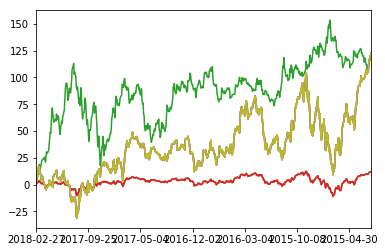

In [196]:
import pandas as pd
import matplotlib.pyplot as plt
data["p_change"].cumsum().plot()
plt.show()

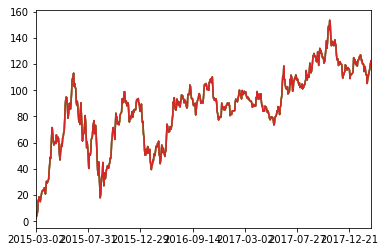

In [200]:
## 首先先进行排序
import matplotlib.pyplot as plt
data["p_change"].sort_index().cumsum().plot()
plt.show()

## 自定义运算
- apply(func,axis=0)
    - func:自定义函数
    - axis=0:默认是列，axis=1为行进行运算
- 定义一个对列，最大值-最小值的函数
    - data[['open','close']].apply(lambda x: x.max()-x.min(),axis=0)


In [201]:
data

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20,turnover,price change
2018-02-27,23.53,25.88,24.16,23.53,95578.03,0.63,2.68,22.942,22.142,22.875,53782.64,46738.65,55576.11,2.39,0.63
2018-02-26,22.80,23.78,23.53,22.80,60985.11,0.69,3.02,22.406,21.955,22.942,40827.52,42736.34,56007.50,1.53,0.73
2018-02-23,22.88,23.37,22.82,22.71,52914.01,0.54,2.42,21.938,21.929,23.022,35119.58,41871.97,56372.85,1.32,-0.06
2018-02-22,22.25,22.76,22.28,22.02,36105.01,0.36,1.64,21.446,21.909,23.137,35397.58,39904.78,60149.60,0.90,0.03
2018-02-14,21.49,21.99,21.92,21.48,23331.04,0.44,2.05,21.366,21.923,23.253,33590.21,42935.74,61716.11,0.58,0.43
2018-02-13,21.40,21.90,21.48,21.31,30802.45,0.28,1.32,21.342,22.103,23.387,39694.65,45518.14,65161.68,0.77,0.08
2018-02-12,20.70,21.40,21.19,20.63,32445.39,0.82,4.03,21.504,22.338,23.533,44645.16,45679.94,68686.33,0.81,0.49
2018-02-09,21.20,21.46,20.36,20.19,54304.01,-1.50,-6.86,21.920,22.596,23.645,48624.36,48982.38,70552.47,1.36,-0.84
2018-02-08,21.79,22.09,21.88,21.75,27068.16,0.09,0.41,22.372,23.009,23.839,44411.98,48612.16,73852.45,0.68,0.09
2018-02-07,22.69,23.11,21.80,21.29,53853.25,-0.50,-2.24,22.480,23.258,23.929,52281.28,56315.11,74925.33,1.35,-0.89


In [204]:
data.apply(lambda x: x.max() - x.min())

open                22.740
high                23.680
close               22.850
low                 21.810
volume          500757.290
price_change         6.550
p_change            20.060
ma5                 21.176
ma10                19.666
ma20                17.478
v_ma5           393638.800
v_ma10          340897.650
v_ma20          245969.790
turnover            12.520
price change         6.710
dtype: float64

# Pandas画图
- pandas.DataFrame.plot
    - DataFrame.plot(x=None,y=None,kind='line')
    - x:label or position, default None
    - y:label, position or list of label, position, default None
        - allows plotting of one column versus another
    - kind: str
        - line: line plot(default)
        - bar: vertical bar plot
        - barh: horizontal bar plot
        - hist: histogram
        - pie: pie plot
        - scatter: scatter plot

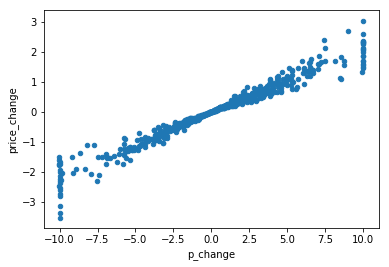

In [208]:
data.plot(x = 'p_change',y = 'price_change',kind = 'scatter')
plt.show()

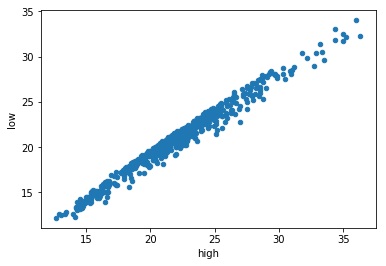

In [209]:
data.plot(x = 'high',y = 'low',kind = 'scatter')
plt.show()

# 文件读取与存储
## CSV
## HDF5
## JSON
## 拓展
## 总结

## CSV
### 读取CSV文件
- pandas.read_csv(filepath_or_buffer,sep=',',delimiter=None)
    - filepath_or_buffer: 文件路径
    - usecols:指定读取的列名，列表形式

In [217]:
pd.read_csv('stock_day.csv', usecols=['open','high','close','volume']).head()

,open,high,close,volume
2018-02-27,23.53,25.88,24.16,95578.03
2018-02-26,22.80,23.78,23.53,60985.11
2018-02-23,22.88,23.37,22.82,52914.01
2018-02-22,22.25,22.76,22.28,36105.01
2018-02-14,21.49,21.99,21.92,23331.04


In [218]:
pd.read_csv('stock_day2.csv').head()   ## 默认第一行做字段了

,2018-02-27,23.53,25.88,24.16,23.53.1,95578.03,0.63,2.68,22.942,22.142,22.875,53782.64,46738.65,55576.11,2.39
0,2018-02-26,22.80,23.78,23.53,22.80,60985.11,0.69,3.02,22.406,21.955,22.942,40827.52,42736.34,56007.50,1.53
1,2018-02-23,22.88,23.37,22.82,22.71,52914.01,0.54,2.42,21.938,21.929,23.022,35119.58,41871.97,56372.85,1.32
2,2018-02-22,22.25,22.76,22.28,22.02,36105.01,0.36,1.64,21.446,21.909,23.137,35397.58,39904.78,60149.60,0.90
3,2018-02-14,21.49,21.99,21.92,21.48,23331.04,0.44,2.05,21.366,21.923,23.253,33590.21,42935.74,61716.11,0.58
4,2018-02-13,21.40,21.90,21.48,21.31,30802.45,0.28,1.32,21.342,22.103,23.387,39694.65,45518.14,65161.68,0.77


In [222]:
data = pd.read_csv('stock_day2.csv', names = ["open", "high", "close", "low", "volume", "price_change", "p_change", "ma5", "ma10", "ma20", "v_ma5", "v_ma10", "v_ma20", "turnover"])

In [223]:
data

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20,turnover
2018-02-27,23.53,25.88,24.16,23.53,95578.03,0.63,2.68,22.942,22.142,22.875,53782.64,46738.65,55576.11,2.39
2018-02-26,22.80,23.78,23.53,22.80,60985.11,0.69,3.02,22.406,21.955,22.942,40827.52,42736.34,56007.50,1.53
2018-02-23,22.88,23.37,22.82,22.71,52914.01,0.54,2.42,21.938,21.929,23.022,35119.58,41871.97,56372.85,1.32
2018-02-22,22.25,22.76,22.28,22.02,36105.01,0.36,1.64,21.446,21.909,23.137,35397.58,39904.78,60149.60,0.90
2018-02-14,21.49,21.99,21.92,21.48,23331.04,0.44,2.05,21.366,21.923,23.253,33590.21,42935.74,61716.11,0.58
2018-02-13,21.40,21.90,21.48,21.31,30802.45,0.28,1.32,21.342,22.103,23.387,39694.65,45518.14,65161.68,0.77
2018-02-12,20.70,21.40,21.19,20.63,32445.39,0.82,4.03,21.504,22.338,23.533,44645.16,45679.94,68686.33,0.81
2018-02-09,21.20,21.46,20.36,20.19,54304.01,-1.50,-6.86,21.920,22.596,23.645,48624.36,48982.38,70552.47,1.36
2018-02-08,21.79,22.09,21.88,21.75,27068.16,0.09,0.41,22.372,23.009,23.839,44411.98,48612.16,73852.45,0.68
2018-02-07,22.69,23.11,21.80,21.29,53853.25,-0.50,-2.24,22.480,23.258,23.929,52281.28,56315.11,74925.33,1.35


### 存储CSV文件
- DataFrame.to_csv(path_or_buf=None,sep='',columns=None,header=True,index=True,index_label=None,mode='w',encoding=None)
- Series.to_csv(path)

In [231]:
# 保存open列的数据
data[:10].to_csv("opentest.csv",columns=['open'])

In [232]:
# 再读取
pd.read_csv("opentest.csv")

,Unnamed: 0,open
0,2018-02-27,23.53
1,2018-02-26,22.80
2,2018-02-23,22.88
3,2018-02-22,22.25
4,2018-02-14,21.49
5,2018-02-13,21.40
6,2018-02-12,20.70
7,2018-02-09,21.20
8,2018-02-08,21.79
9,2018-02-07,22.69


In [229]:
# 不要行索引
data[:10].to_csv("opentest.csv",columns=['open'],index=False)

In [233]:
# 再读取
pd.read_csv("opentest.csv")

,Unnamed: 0,open
0,2018-02-27,23.53
1,2018-02-26,22.80
2,2018-02-23,22.88
3,2018-02-22,22.25
4,2018-02-14,21.49
5,2018-02-13,21.40
6,2018-02-12,20.70
7,2018-02-09,21.20
8,2018-02-08,21.79
9,2018-02-07,22.69


In [234]:
data[:10].to_csv("opentest.csv",columns=['open'],index=False,mode ="a")

In [235]:
pd.read_csv("opentest.csv")

,Unnamed: 0,open
0,2018-02-27,23.53
1,2018-02-26,22.80
2,2018-02-23,22.88
3,2018-02-22,22.25
4,2018-02-14,21.49
5,2018-02-13,21.40
6,2018-02-12,20.70
7,2018-02-09,21.20
8,2018-02-08,21.79
9,2018-02-07,22.69


In [237]:
data[:10].to_csv("opentest.csv",columns=['open'],index=False,mode ="a",header = False)

In [238]:
pd.read_csv("opentest.csv")

,Unnamed: 0,open
0,2018-02-27,23.53
1,2018-02-26,22.80
2,2018-02-23,22.88
3,2018-02-22,22.25
4,2018-02-14,21.49
5,2018-02-13,21.40
6,2018-02-12,20.70
7,2018-02-09,21.20
8,2018-02-08,21.79
9,2018-02-07,22.69


## HDF5
- read_hdf()
- to_hdf()
- HDF5存储3维数据的文件
    - key1 dataframe1二维数据
    - key2 dataframe2二维数据
- HDF5文件的读取和存储都需要指定一个键，值为要存储的DataFrame
    - pandas.read_hdf(path_or_buf, key =None, **kwargs)

In [241]:
day_close = pd.read_hdf("day_close.h5")
day_close

,000001.SZ,000002.SZ,000004.SZ,000005.SZ,000006.SZ,000007.SZ,000008.SZ,000009.SZ,000010.SZ,000011.SZ,...,001965.SZ,603283.SH,002920.SZ,002921.SZ,300684.SZ,002922.SZ,300735.SZ,603329.SH,603655.SH,603080.SH
0,16.30,17.71,4.58,2.88,14.60,2.62,4.96,4.66,5.37,6.02,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,17.02,19.20,4.65,3.02,15.97,2.65,4.95,4.70,5.37,6.27,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,17.02,17.28,4.56,3.06,14.37,2.63,4.82,4.47,5.37,5.96,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,16.18,16.97,4.49,2.95,13.10,2.73,4.89,4.33,5.37,5.77,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,16.95,17.19,4.55,2.99,13.18,2.77,4.97,4.42,5.37,5.92,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,17.76,17.30,4.78,3.10,13.70,3.01,5.17,4.63,5.37,6.22,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,18.10,16.93,4.98,3.16,13.48,3.31,5.69,4.78,5.37,6.48,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,17.71,17.93,4.91,3.25,13.89,3.25,5.98,4.88,5.37,6.57,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,17.40,17.65,4.95,3.20,13.89,3.01,5.58,4.84,5.37,6.25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,18.27,18.58,4.95,3.23,13.97,3.05,5.76,4.94,5.37,6.56,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [242]:
day_close.to_hdf("test.h5")

TypeError: to_hdf() missing 1 required positional argument: 'key'

In [244]:
day_close.to_hdf("test.h5",key="close")

In [250]:
pd.read_hdf("test.h5").head()

,000001.SZ,000002.SZ,000004.SZ,000005.SZ,000006.SZ,000007.SZ,000008.SZ,000009.SZ,000010.SZ,000011.SZ,...,001965.SZ,603283.SH,002920.SZ,002921.SZ,300684.SZ,002922.SZ,300735.SZ,603329.SH,603655.SH,603080.SH
0,16.30,17.71,4.58,2.88,14.60,2.62,4.96,4.66,5.37,6.02,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,17.02,19.20,4.65,3.02,15.97,2.65,4.95,4.70,5.37,6.27,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,17.02,17.28,4.56,3.06,14.37,2.63,4.82,4.47,5.37,5.96,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,16.18,16.97,4.49,2.95,13.10,2.73,4.89,4.33,5.37,5.77,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,16.95,17.19,4.55,2.99,13.18,2.77,4.97,4.42,5.37,5.92,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [249]:
pd.read_hdf("test.h5",key="close").head()

,000001.SZ,000002.SZ,000004.SZ,000005.SZ,000006.SZ,000007.SZ,000008.SZ,000009.SZ,000010.SZ,000011.SZ,...,001965.SZ,603283.SH,002920.SZ,002921.SZ,300684.SZ,002922.SZ,300735.SZ,603329.SH,603655.SH,603080.SH
0,16.30,17.71,4.58,2.88,14.60,2.62,4.96,4.66,5.37,6.02,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,17.02,19.20,4.65,3.02,15.97,2.65,4.95,4.70,5.37,6.27,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,17.02,17.28,4.56,3.06,14.37,2.63,4.82,4.47,5.37,5.96,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,16.18,16.97,4.49,2.95,13.10,2.73,4.89,4.33,5.37,5.77,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,16.95,17.19,4.55,2.99,13.18,2.77,4.97,4.42,5.37,5.92,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [248]:
pd.read_hdf("day_open.h5").head()

,000001.SZ,000002.SZ,000004.SZ,000005.SZ,000006.SZ,000007.SZ,000008.SZ,000009.SZ,000010.SZ,000011.SZ,...,001965.SZ,603283.SH,002920.SZ,002921.SZ,300684.SZ,002922.SZ,300735.SZ,603329.SH,603655.SH,603080.SH
0,15.50,16.15,4.26,2.73,13.99,2.52,4.76,4.45,5.37,5.79,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,16.50,17.94,4.53,2.91,14.78,2.61,4.99,4.69,5.37,6.03,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,17.00,18.80,4.63,3.04,16.08,2.65,4.96,4.73,5.37,6.26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,16.95,16.59,4.52,3.02,13.20,2.63,4.81,4.35,5.37,5.74,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,16.20,16.96,4.50,2.95,13.17,2.80,4.88,4.34,5.37,5.80,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## JSON
- Json是我们常见的一种数据交换格式，前面在前后端的交互经常用到，也会在存储的时候选择这种格式。所以我们需要知道pandas如何进行读取和存储Json格式
- pandas.read_json(path_or_buf=None, orient=None,typ='frame',lines=False)
    - orient = 'records'
    - lines: boolean, default False
        - 按照每行读取json对象

In [254]:
article = pd.read_json("Sarcasm_Headlines_Dataset.json", orient = 'records', lines=True)
article

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0
5,https://www.huffingtonpost.com/entry/advancing...,advancing the world's women,0
6,https://www.huffingtonpost.com/entry/how-meat-...,the fascinating case for eating lab-grown meat,0
7,https://www.huffingtonpost.com/entry/boxed-col...,"this ceo will send your kids to school, if you...",0
8,https://politics.theonion.com/top-snake-handle...,top snake handler leaves sinking huckabee camp...,1
9,https://www.huffingtonpost.com/entry/fridays-m...,friday's morning email: inside trump's presser...,0


In [255]:
article.to_json("test.json", orient="records", lines=True)

## 拓展
- HDF5在存储的是支持压缩，使用的方法时blosc，这是速度最快也是pandas默认支持的。
- 使用压缩可以提高磁盘利用率，节省空间
- HDF5还是跨平台的，可以轻松迁移到hadoop上面

## 总结

# 高级处理 - 缺失值处理

# 高级处理 - 数据离散化

# 高级处理 - 合并

# 高级处理 - 交叉表与透视表

# 高级处理 - 分组与聚合

# 综合案例